# Project 3: Regression

## Imports

In [77]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Data

In [63]:
raw_songs_df = pd.read_csv("spotify-2023.csv", encoding="latin1")

### Data Pre Processing

In [64]:
raw_songs_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [65]:
raw_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [66]:
raw_songs_df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

#### in_shazam_charts and key are not vital for our expriements so we will drop those columns

In [67]:
raw_songs_df.drop(columns=['in_shazam_charts'], inplace=True)
raw_songs_df.drop(columns=['key'], inplace=True)

#### After removing our nulls we will foramt our data to only have the features we need. Only keeping mode, danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_%, streams


In [68]:
songs_df = raw_songs_df[['mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'streams']]

#### Now we need to encode mode for it to used in our models

In [69]:
size_mapping = {'Minor': 0, 'Major': 1}
songs_df['mode_Encoded_Map'] = songs_df['mode'].map(size_mapping)
songs_df.drop(columns=['mode'], inplace=True)

/var/folders/5s/zhk248fj34153byjj3qy77tm0000gn/T/ipykernel_3390/1504296525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_df['mode_Encoded_Map'] = songs_df['mode'].map(size_mapping)
/var/folders/5s/zhk248fj34153byjj3qy77tm0000gn/T/ipykernel_3390/1504296525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_df.drop(columns=['mode'], inplace=True)


#### Lets make sure the rest of our vairbles are numerical

In [107]:
songs_df.dtypes

#converting streams to numerical
songs_df['streams'] = pd.to_numeric(songs_df['streams'], errors='coerce')
songs_df = songs_df.dropna(subset=['streams'])
songs_df.dtypes

/var/folders/5s/zhk248fj34153byjj3qy77tm0000gn/T/ipykernel_3390/499109797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_df['streams'] = pd.to_numeric(songs_df['streams'], errors='coerce')


danceability_%          int64
valence_%               int64
energy_%                int64
acousticness_%          int64
instrumentalness_%      int64
liveness_%              int64
speechiness_%           int64
streams               float64
mode_Encoded_Map        int64
dtype: object

Checking the correlation between different features in our dataset

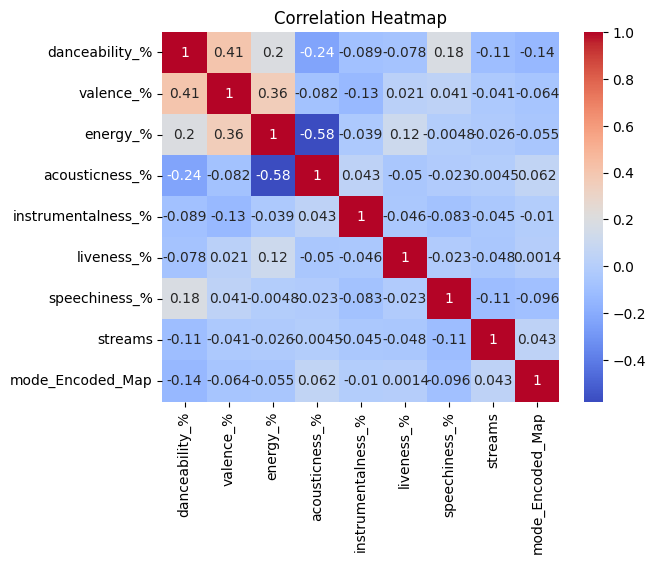

In [98]:
#lets avoid using string features for our correlation heatmap
sns.heatmap(songs_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# First Model

### First linear regression model with all my variables

In [108]:
y = songs_df['streams']                  # Series, 1-D (OK for y)
X = songs_df.drop(columns=['streams'])  # DataFrame, 2-D (OK for X)

# First Model


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")


Intercept: 944482427.0832744
Coefficient: [-3899200.86102435   948699.3280555   -772625.55506446  -960768.29706927
 -3844625.73086608 -3304048.40024199 -7075889.03234012  7619504.15174988]


In [110]:
# Predict streams for the test set
y_pred = model.predict(X_test)

# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

           Actual     Predicted
199  1.479115e+09  6.672424e+08
420  7.848982e+07  4.139289e+08
695  1.439191e+09  6.111985e+08
751  1.069331e+08  4.944863e+08
507  1.309887e+09  5.728722e+08


In [111]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

Mean Squared Error: 2.472179015987894e+17
R-squared score: -0.009906723467243639
